# Lấy thông tin của tài khoản

- Đoc tại đây: 
https://www.mql5.com/en/docs/account
- Xác định trước giá trị muốn lấy về thụôc kiểu dữ liệu nào?
    - Double
    - Integer
    - String
- Ví dụ: Muốn lấy Balance của tk, nó là giá trị kiểu Double, thì ta sử dụng hàm `AccountInfoDouble()` với tham số truyền ACCOUNT_BALANCE thuộc ENUM_ACCOUNT_INFO_DOUBLE.
    - Đọc thêm tại đây: 
    https://www.mql5.com/en/docs/account/accountinfodouble
    
- Muốn lấy giá trị số của tk, nó là gía trị kiểu Integerm thì ta sử dụng hàm `AccountInfoInteger` với tham số truyền ACCOUNT_LOGIN thuộc ENUM_ACCOUNT_INFO_INTEGER
    - Đọc thêm tại đây: 
    https://www.mql5.com/en/docs/account/accountinfointeger
    
- Muốn lấy giá trị tên tk, nó là giá trị kiểu String, thì ta sử dụng hàm `AccountInfoString` với tham số truyền ACCOUNT_NAME thuộc ENUM_ACCOUNT_INFO_STRING
    - Đọc thêm tại đây: 
    https://www.mql5.com/en/docs/account/accountinfostring

In [ ]:
double balance = AccountInfoDouble(ACCOUNT_BALANCE);

int account_number = AccountInfoInteger(ACCOUNT_LOGIN);

string account_name = AccountInfoString(ACCOUNT_NAME);

# Các hàm xử lý về thời gian

- Đọc tại đây: 
https://www.mql5.com/en/docs/dateandtime

- Kiểu dữ liệu trả về là `datetime`
    - Đọc tại đây: 
    https://www.mql5.com/en/docs/basis/types/integer/datetime

- Kiểu dữ liệu trả về là `MqlDateTime`
    - Đọc tại đây: 
    https://www.mql5.com/en/docs/constants/structures/mqldatetime
    

In [ ]:
datetime current_time = TimeCurrent();

MqlDateTime str_time = TimeCurrent();
int year = str_time.year;
int hour = str_time.hour;

# Lấy thông tin liên quan đến thị trường

- Đọc tại đây: 
https://www.mql5.com/en/docs/marketinformation

- Lấy tên cặp tiền: `_Symbol` hoặc `Symbol()`
- Lấy point của cặp tiền: `_Point`
- Lấy số chữ số thập phân: `_Digits`

- Xác định thông tin định lấy từ cặp tiền thuộc kiểu dữ liệu nào? 
    - Double? thì dùng `SymbolInfoDouble()`, đọc tại đây: 
    https://www.mql5.com/en/docs/marketinformation/symbolinfodouble
    - Integer? thì dùng `SymbolInfoInteger()`, đọc tại đây: 
    https://www.mql5.com/en/docs/marketinformation/symbolinfointeger
    - String? thì dùng `SymbolInfoString`, đọc tại đây: 
    https://www.mql5.com/en/docs/marketinformation/symbolinfostring
    - tham số truyền là các ENUM tương ứng

In [ ]:
string symbol_1 = _Symbol;
string symbol_2 = Symbol();

# Ví dụ: lấy giá ask và bid. phải dùng cách này, khác với mql4
double ask = SymbolInfoDouble(_Symbol, SYMBOL_ASK);
double bid = SymbolInfoDouble(_Symbol, SYMBOL_BID);

int spread = SymbolInfoInteger(_Symbol, SYMBOL_SPREAD);

string exchange = SymbolInfoString(_Symbol, SYMBOL_EXCHANGE);

# Các indicator có sẵn


- Danh sách: 
https://www.mql5.com/en/docs/indicators

- Lưu ý khi dùng các hàm indicator có sẵn là nó trả về **handle** của indicator đó, chứ ko phải chuỗi giá trị, khác với MQL4
- Do đó, ta phải dùng thêm phương thức `CopyBuffer()` để lấy buffer trong handle indicator, buffer là giá trị tương ứng

- Ví dụ về lấy giá trị của 10 giá trị EMA(20) gần nhất:
    - Ta bắt đầu so sánh giá trị tương ứng trong mảng EMA[] theo index, chú ý **index bị đảo ngược** so với chuỗi Coppy
    - Đọc ở đây: 
    https://www.mql5.com/en/docs/series/copybuffer

- Hình giải thích index trong CoppyBuffer() từ handle ra Array giá trị:

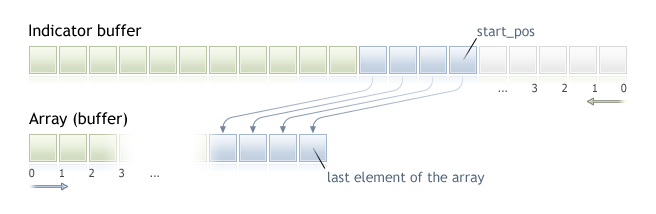

In [ ]:
int value_ema = 20;
int ema_handle = iMA(_Symbol, PERIOD_H1, value_ema, 0, MODE_EMA, PRICE_CLOSE);
int size = 10;

// mảng này sẽ lưu giá trị copy từ buffer ra
double EMA[];

// coppy gía trị từ handle ra mảng EMA[], coppy từ vị trí thứ 0, lấy size giá trị ngược lại
CopyBuffer(ema_handle, 0, 0, size, EMA);

// Ta bắt đầu so sánh giá trị tương ứng trong mảng EMA[] theo index, chú ý index bị đảo ngược so với chuỗi Coppy
// Ví dụ múôn lấy EMA hiện tại là: 
EMA[size - 1]

// Giá trị EMA liền trước so với hiện tại là size - 2; (ở MQL4, hiện tại là index = 0, liền trước index = 1)
// thì ở MQL5: index = 0 tương ứng index = size - 1

// So sánh 2 giá trị EMA để tìm giao cắt

# Chuỗi thời gian và indicator


- Đọc thêm các hàm xử lý chuỗi thời gian và indicator ở đây: 

https://www.mql5.com/en/docs/series
(Tương đối khác với **MQL4**)

- Các hàm thường dùng:
    - `iClose`: https://www.mql5.com/en/docs/series/iclose
    - `iHighest`: https://www.mql5.com/en/docs/series/ihighest
    - `iLowest`: https://www.mql5.com/en/docs/series/ilowest
    - `iHigh`: https://www.mql5.com/en/docs/series/ihigh
    - `iTime`: https://www.mql5.com/en/docs/series/itime
    - `CopyBuffer`: https://www.mql5.com/en/docs/series/copybuffer

In [ ]:
// Ví dụ dùng hàm `iTime()` để xác nhận vừa sang nến mới

datetime tcandle = iTime(_Symbol, PERIOD_H1, 0);

bool is_new_candle()
{
    if (tcandle == iTime(_Symbol, PERIOD_H1, 1))
    {
        tcandle = iTime(_Symbol, PERIOD_H1, 0);
        return true;        
    }
    return false;
}


# Xử lý vào - ra lệnh trong MQL5 (khác MQL4)

- Đọc ở đây: 
https://www.mql5.com/en/docs/trading

- Lệnh trong MQl5 chia làm 3 loại:
    - **Deal**: trước khi vào lênh, deal được gửi tới sàn và đuọc sàn chấp nhận xử lý hay ko?
    - **Order**: deal đã được xử lý sẽ thành Order
    - **Position**: những lệnh đang trong chạy trên thị trường

- Tương ứng với mỗi loại có một Class riêng để xử lý:
- Liên quan đên vào - ra lệnh, sử dụng **class CTrade**: 
https://www.mql5.com/en/docs/standardlibrary/tradeclasses/ctrade

- Liên quan đến vị thế lệnh đang chạy, sử dụng **class CPositionInfo**: 
https://www.mql5.com/en/docs/standardlibrary/tradeclasses/cpositioninfo

- Một số phương thức hay sử dụng:
    - **Buy()**: 
    https://www.mql5.com/en/docs/standardlibrary/tradeclasses/ctrade/ctradebuy
    - **Sell**:
    https://www.mql5.com/en/docs/standardlibrary/tradeclasses/ctrade/ctradesell
    - **PositionModify()**: 
    https://www.mql5.com/en/docs/standardlibrary/tradeclasses/ctrade/ctradepositionmodify
    - **PositionClose()**: 
    https://www.mql5.com/en/docs/standardlibrary/tradeclasses/ctrade/ctradepositionclose

In [ ]:
// Ví dụ, vào 1 lệnh BUY, tương tự cho SELL

#include <Trade\Trade.mqh>
CTrade trade;

double volume = 0.01;
bool b = trade.Buy(volume);

In [ ]:
// Ví dụ về chỉnh sửa lệnh

bool m = trade.PositionModify(_Symbol, sl, tp);

In [ ]:
// Ví dụ về hàm close_all lệnh

void close_all()
{
   int totals = PositionsTotal();
   for(int i=0; i<totals; i++)
   {  
      if (PositionGetSymbol(i) == _Symbol)
      {
         ulong ticket = PositionGetInteger(POSITION_TICKET);
         int k = trade.PositionClose(ticket);
      }
   }


# Xử lý các Object vẽ trong chart


- Đọc ở đây: https://www.mql5.com/en/docs/objects
- Hầu hết tương tự với MQL4
- Thường chỉ sử dụng các hàm sau: 
    - `ObjectCreate()`: https://www.mql5.com/en/docs/objects/objectcreate
    - `ObjectSetInteger()`: https://www.mql5.com/en/docs/objects/objectsetinteger
    - `ObjectDelete()`: https://www.mql5.com/en/docs/objects/objectdelete

- Các loại Object: https://www.mql5.com/en/docs/constants/objectconstants/enum_object

In [ ]:
// Ví dụ về tạo một Button Object

// create button
name_button = "_close_";
corner = CORNER_RIGHT_UPPER;

x = 220; y = 180;
width = 100; height = 50;

text = "CLOSE";
font_size = 16;
clr = clrGray;

ObjectDelete(0, name_button);
ObjectCreate(0, name_button, OBJ_BUTTON, 0, 0, 0);
ObjectSetInteger(0, name_button, OBJPROP_CORNER, corner);
ObjectSetInteger(0, name_button, OBJPROP_XDISTANCE, x);
ObjectSetInteger(0, name_button, OBJPROP_YDISTANCE, y);
ObjectSetInteger(0, name_button, OBJPROP_XSIZE, width);
ObjectSetInteger(0, name_button, OBJPROP_YSIZE, height);
ObjectSetString(0, name_button, OBJPROP_TEXT, text);
ObjectSetInteger(0, name_button, OBJPROP_FONTSIZE, font_size);
ObjectSetInteger(0, name_button, OBJPROP_COLOR, clr);
ObjectSetInteger(0, name_button, OBJPROP_STATE, false);
ObjectSetInteger(0, name_button, OBJPROP_ZORDER, 0);

# Các kiểu dữ liệu dạng Struct được định sẵn trong MQL5

- Danh sách: https://www.mql5.com/en/docs/constants/structures

- Thường dùng:
    - `MqlDateTime`: Để lấy giờ phút giây, ngày tháng năm cụ thể
    https://www.mql5.com/en/docs/constants/structures/mqldatetime
    - `MqlTradeRequest`: Dạng đầu vào để vào 1 lệnh
    https://www.mql5.com/en/docs/constants/structures/mqltraderequest
    - `MqlTradeResult`: Kết quả trả về sau khi vừa vào 1 lệnh
    https://www.mql5.com/en/docs/constants/structures/mqltraderesult

In [ ]:
// Cách vào 1 lệnh Buy trong mql5

MqlTradeRequest request = {};
MqlTradeResult  result  = {};

request.action   = TRADE_ACTION_DEAL;                     // type of trade operation
request.symbol   = _Symbol;                               // symbol
request.volume   = 0.01;                                   // volume of 0.1 lot
request.type     = ORDER_TYPE_BUY;                        // order type
request.price    = SymbolInfoDouble(_Symbol, SYMBOL_ASK); // price for opening
request.deviation= 5;                                     // allowed deviation from the price
request.magic    = EXPERT_MAGIC;                          // MagicNumber of the order

// Thực thi lệnh
bool b = OrderSend(request, result);

// Lấy ticket của lệnh vừa vào
ulong ticket = result.order;

- Các kiểu hành động liên quan tới lệnh trong mql5:
https://www.mql5.com/en/docs/constants/tradingconstants/enum_trade_request_actions#trade_action_modify

- Ví dụ Modify dùng `request.action = TRADE_ACTION_MODIFY;`

- Lệnh Pending dùng: `request.action = TRADE_ACTION_PENDING;`

In [ ]:
request.action = TRADE_ACTION_MODIFY;

request.action = TRADE_ACTION_PENDING; 

- Enum kiểu lệnh: https://www.mql5.com/en/docs/constants/tradingconstants/orderproperties#enum_order_type

In [ ]:
ORDER_TYPE_BUY // Market Buy order

ORDER_TYPE_SELL // Market Sell order

ORDER_TYPE_BUY_LIMIT // Buy Limit pending order
 
ORDER_TYPE_SELL_LIMIT // Sell Limit pending order

ORDER_TYPE_BUY_STOP // Buy Stop pending order

ORDER_TYPE_SELL_STOP // Sell Stop pending order

# Xử lý với Files

- Nhìn chung tương tự mới mql4:
- Đọc ở đây: https://www.mql5.com/en/docs/files

# Các xử lý với mạng bên ngoài

- Đọc tại đây: https://www.mql5.com/en/docs/network

- Dùng `WebRequest` để gửi message qua **Telegram**: 
    - Đọc: https://www.mql5.com/en/docs/network/webrequest

- Dùng `SendNotification` để gửi message qua MT5 điện thoại:
    - Đọc: https://www.mql5.com/en/docs/network/sendnotification

In [ ]:
void OnTick()
{
   string cookie = NULL, headers;
   char   post[], result[];
   
   string TOKEN = "";
   string CHAT_ID = "";
   
   string text = ">>> from bot";
   string url = StringFormat("https://api.telegram.org/bot%s/sendMessage?chat_id=%s&text=%s",TOKEN,CHAT_ID,text);

   ResetLastError();
   int res = WebRequest("POST",url,cookie,NULL,500,post,0,result,headers);
   if(res) {
      PrintFormat(">>> done !");
   }
   
   Sleep(10000);
}

In [ ]:
SendNotification(">>> from bot");

# Tất cả các hàm trong MQL5

- Đọc tại đây: https://www.mql5.com/en/docs/function_indices

# Tất cả các hằng và ENUM trong MQL5


- Đọc tại đây: https://www.mql5.com/en/docs/constant_indices